# Analyzing HSA - Kinase Inhibitor binding experimental data batch 1 (2016/03/28)

## rows E and F : erlotinib
Plotting functions here come from Sonya Hanson's ipython notebook analyzing CK2, AZ, data.

https://github.com/choderalab/astrazeneca-collaboration/blob/master/fluorescence_assay/CK2/CK2-fluorescent-inhibitor-assay.ipynb

Procedural details of the script can be found here: https://github.com/choderalab/lab-protocols/blob/master/Fluo_Inhibitor_Spectra_Assay/Fluo_Inhibitor_Spectra_Assay.md

Lab notebook: "Lab Notebook of  Fluor Assay HSA-kinase inhibitors (started at 20160317).docx" https://docs.google.com/a/choderalab.org/document/d/1dbpGjk7WVFpdvcxOYzsechQanNH8AF0_zg812ZDEvJI/edit?usp=sharing

## Plotting results

Below we are plotting the results of the fluorescence assay. These functions are also in grants.py in assaytools, but have needed to be modified here because of results that include 2 gains.

In [3]:
from lxml import etree
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob

sns.set(style='white')
sns.set_context('talk')
sns.despine()

#for assaytools analysis
import re
import pymc

%matplotlib inline

In [4]:
file_set = {'HSA': glob("data_ordered/*.xml")}
ligands = ['Bosutinib','Bosutinib Isomer','Erlotinib','Gefitinib']

In [5]:
file1 = file_set["HSA"][0]
root = etree.parse(file1)

### Define Sections.

Sections = root.xpath("/*/Section")
much = len(Sections)
print "****The xml file " + file1 + " has %s data sections:****" % much
for sect in Sections:
    print sect.attrib['Name']

#print Sections[4].attrib["Name"]

****The xml file data_ordered/A_hsa_bos_20160328_133616.xml has 5 data sections:****
em280
em340
em280_Copy2
em340_Copy2
abs


In [6]:
#This function allows us to plot spectra
def plot_spectra_grid(file_set,protein,ligands,ligand):
    grid = len(protein) + len(ligand)
    
    # pick the correct file
    proteins = file_set.keys()
    index = ligands.index(ligand)
    file = file_set[protein][index]
    
    # pick a title
    title = "%s - %s" %(protein, ligand)
    
    # make a dataframe
    df = xml2df(file)
    
    # plot the spectra
    fig = plt.figure();
    for i in range(11):
        
        df.iloc[:,i].plot(ylim=(0,20000),linewidth=1,c=cm.Blues(300+i*(-40)))
        df.iloc[:,11+i].plot(ylim=(0,20000),legend=False, linewidth=1,c=cm.gray(i*15+50), fontsize =12);
    sns.despine()
    plt.xlim(320,600)
    #plt.yticks([])
    plt.xlabel('wavelength (nm)', fontsize=12)
    plt.ylabel('fluorescence', fontsize=12)

In [7]:
#This function allows us to plot spectra of ligand negative control well
#Well 12 has no ligand, just DMSO backfill
def plot_spectra_grid_well12(file_set,protein,ligands,ligand):
    grid = len(protein) + len(ligand)
    
    # pick the correct file
    proteins = file_set.keys()
    index = ligands.index(ligand)
    file = file_set[protein][index]
    
    # pick a title
    title = "%s - %s" %(protein, ligand)
    
    # make a dataframe
    df = xml2df(file)
    
    # plot the spectra
    fig = plt.figure();
    ax = df.iloc[:,11].plot(ylim=(0,20000),label="1 uM HSA", linewidth=1,color='b');
    ax = df.iloc[:,23].plot(ylim=(0,20000),label="buffer", linewidth=1,color='k');
    sns.despine()
    plt.xlim(320,600)
    #plt.yticks([])
    plt.xlabel('wavelength (nm)', fontsize=12)
    plt.ylabel('fluorescence', fontsize=12)

### Fluorescence Emission Spectra ($\lambda_{ex}$ = 280 nm, gain=100)

In [8]:
#This function allows us to import xml format data files and convert them to a pandas dataframe
def xml2df(file):

    root = etree.parse(file)

    data = []

    reads = root.xpath("/*/Section[1]/*/Well")
    
    test_path = root.xpath("/*/Section[1]")
    print test_path[0].attrib["Name"]                                
    
    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(s.text, float(s.attrib['WL']), r.attrib['Pos'])
        for r in reads
        for s in r]

    dataframe = pd.DataFrame(data, columns=['fluorescence','wavelength (nm)','Well'])
            
    ## replace over with NaN
    dataframe = dataframe.replace({'OVER': np.NaN})

    # Pivot table to get well IDs as columns
    dataframe[['fluorescence']] = dataframe[['fluorescence']].astype('float')
    dataframe = pd.pivot_table(dataframe, index = 'wavelength (nm)', columns = ['Well'])

    # Order columns. Example: C1, C2 ..., C12, D1, D2 ... D12
    sorted_wellIDs = wellIDs[:12]+wellIDs[:11:-1]
    dataframe=dataframe["fluorescence"][sorted_wellIDs]
    dataframe.to_csv("dataframe.csv")
    
    return dataframe

The blue pectra are the spectra with 1 uM protein included.
The grey spectra are the spectra in buffer.
Blue: dark --> light, and grey: Black --> white, represent a range of ligand concentration from 20 uM to 8nM.

em280
em280


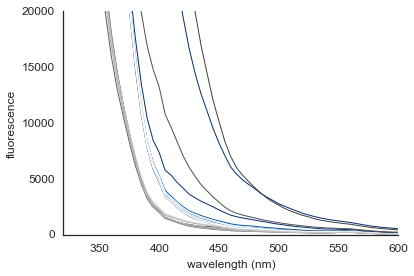

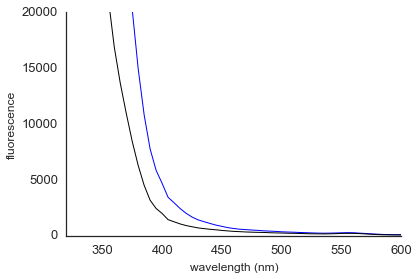

In [9]:
plot_spectra_grid(file_set,'HSA',ligands,'Erlotinib')
plot_spectra_grid_well12(file_set,'HSA',ligands,'Erlotinib')

### Fluorescence Emission Spectra ($\lambda_{ex}$ = 340 nm, gain=120)

In [10]:
#This function allows us to import xml format data files and convert them to a pandas dataframe
def xml2df(file):

    root = etree.parse(file)

    data = []

    reads = root.xpath("/*/Section[4]/*/Well")
    
    test_path = root.xpath("/*/Section[4]")
    print test_path[0].attrib["Name"]                                
    
    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(s.text, float(s.attrib['WL']), r.attrib['Pos'])
        for r in reads
        for s in r]

    dataframe = pd.DataFrame(data, columns=['fluorescence','wavelength (nm)','Well'])
            
    ## replace over with NaN
    dataframe = dataframe.replace({'OVER': np.NaN})

    # Pivot table to get well IDs as columns
    dataframe[['fluorescence']] = dataframe[['fluorescence']].astype('float')
    dataframe = pd.pivot_table(dataframe, index = 'wavelength (nm)', columns = ['Well'])

    # Order columns. Example: C1, C2 ..., C12, D1, D2 ... D12
    sorted_wellIDs = wellIDs[:12]+wellIDs[:11:-1]
    dataframe=dataframe["fluorescence"][sorted_wellIDs]
    dataframe.to_csv("dataframe.csv")
    
    return dataframe

em340_Copy2
em340_Copy2


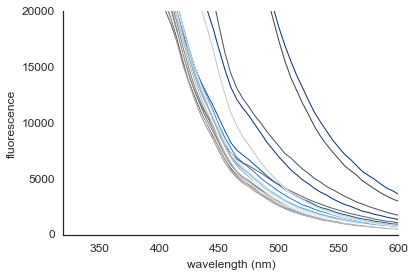

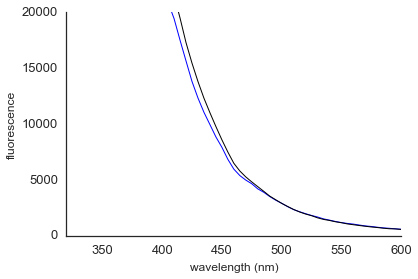

In [11]:
plot_spectra_grid(file_set,'HSA',ligands,'Erlotinib')
plot_spectra_grid_well12(file_set,'HSA',ligands,'Erlotinib')

### Fluorescence Emission Spectra ($\lambda_{ex}$ = 280 nm, gain=120)

In [12]:
#This function allows us to import xml format data files and convert them to a pandas dataframe
def xml2df(file):

    root = etree.parse(file)

    data = []

    reads = root.xpath("/*/Section[3]/*/Well")
    
    test_path = root.xpath("/*/Section[3]")
    print test_path[0].attrib["Name"]                                
    
    wellIDs = [read.attrib['Pos'] for read in reads]

    data = [(s.text, float(s.attrib['WL']), r.attrib['Pos'])
        for r in reads
        for s in r]

    dataframe = pd.DataFrame(data, columns=['fluorescence','wavelength (nm)','Well'])
            
    ## replace over with NaN
    dataframe = dataframe.replace({'OVER': np.NaN})

    # Pivot table to get well IDs as columns
    dataframe[['fluorescence']] = dataframe[['fluorescence']].astype('float')
    dataframe = pd.pivot_table(dataframe, index = 'wavelength (nm)', columns = ['Well'])

    # Order columns. Example: C1, C2 ..., C12, D1, D2 ... D12
    sorted_wellIDs = wellIDs[:12]+wellIDs[:11:-1]
    dataframe=dataframe["fluorescence"][sorted_wellIDs]
    dataframe.to_csv("dataframe.csv")
    
    return dataframe

em280_Copy2
em280_Copy2


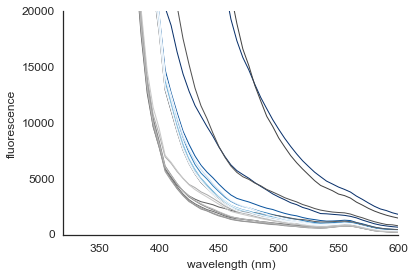

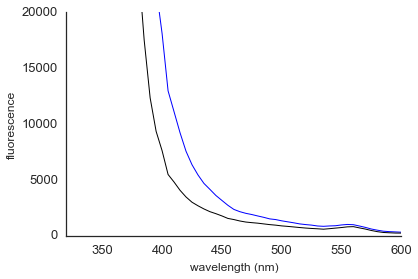

In [13]:
plot_spectra_grid(file_set,'HSA',ligands,'Erlotinib')
plot_spectra_grid_well12(file_set,'HSA',ligands,'Erlotinib')

#### Finding optimum wavelength for binding curve
Find the wavelength where fluorescence signal from C1(protein + highest conc of ligand)  - D1(buffer + highest conc of ligand) is maximum. I will subtract C12 from C1 and D12 from D1 to subtract background fluorescence.

In [14]:
df_ex280_gain120=pd.read_csv("dataframe.csv", index_col=0)

C1 = df_ex280_gain120.ix[:,"E1"]
C12 = df_ex280_gain120.ix[:,"E12"]
C1_background_subt = C1.subtract(C12)
D1 = df_ex280_gain120.ix[:,"F1"]
D12 = df_ex280_gain120.ix[:,"F12"]
D1_background_subt = D1.subtract(D12)
C1_subt_D1=C1.subtract(D1)
C1_bkgs_sub_D1_bkgs= C1_background_subt.subtract(D1_background_subt)

wavelength = C1.index

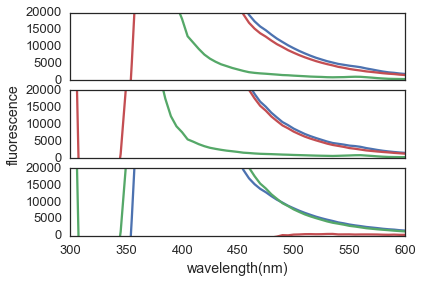

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)

ax1.plot(wavelength, C1)
ax1.plot(wavelength, C12)
ax1.plot(wavelength, C1_background_subt)
ax1.set_ylim(0,20000)

ax2.plot(wavelength, D1)
ax2.plot(wavelength,D12)
ax2.plot(wavelength,D1_background_subt)
ax2.set_ylim(0, 20000)

ax3.plot(wavelength,C1_background_subt)
ax3.plot(wavelength,D1_background_subt)
ax3.plot(wavelength,C1_bkgs_sub_D1_bkgs)
ax3.set_ylim(0, 20000)

ax3.set_xlabel("wavelength(nm)")
ax2.set_ylabel("fluorescence")
f.subplots_adjust(hspace=0.15)

In [16]:
max_wavelength = C1_bkgs_sub_D1_bkgs.idxmax()
max_wavelength
int(max_wavelength)

535

In [17]:
#Theoretical ligand conc here. (Needs to be corrected for actual ligand conc.)
# ligand concentration, M
ligand_conc = np.array([20.0e-6,9.15e-6,4.18e-6,1.91e-6,0.875e-6,0.4e-6,0.183e-6,0.0837e-6,0.0383e-6,0.0175e-6,0.008e-6,0.0001e-6], np.float64) 

#Fluorescence reads at selected wavelength (max_wavelenght)
complex_fluorescence=df_ex280_gain120.ix[max_wavelength,0:12]
ligand_fluorescence=df_ex280_gain120.ix[max_wavelength,12:24]

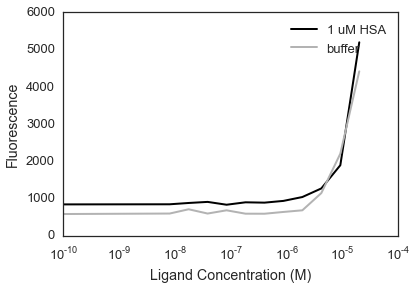

In [18]:
plt.semilogx(ligand_conc,complex_fluorescence.values,linewidth=2,color='k', label="1 uM HSA")
plt.semilogx(ligand_conc,ligand_fluorescence.values,linewidth=2,color='0.70', label="buffer")
plt.xlabel('Ligand Concentration (M)')
plt.ylabel('Fluorescence')
plt.legend()

#### Data Analysis Using Assaytools and determining Kd

In [19]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [20]:
# Load data from Tecan iControl XML file.
from assaytools import platereader

# Stated concentrations of protein and ligand.
Pstated = 1.0e-6 * np.ones([12],np.float64) # protein concentration, M
Lstated = ligand_conc # ligand concentrations, M

In [21]:
# Assay configuration details
import math
assay_volume = 100e-6 # assay volume, L
#well_area = 0.3969 # well area, cm^2 for 4ti-0223 [http://4ti.co.uk/files/1614/0542/7662/4ti-0223_Marketing_Drawing.pdf]
ravg = (0.696/2. + 0.658/2.)/2. # average radius for Greiner UV-Star 96-well flat-bottom plates: http://www.greinerbioone.com/nl/belgium/files/1464609/655809.pdf
well_area = math.pi * ravg**2 
path_length = assay_volume * 1000 / well_area # cm, needed for inner filter effect corrections     

# Uncertainties in protein and ligand concentrations.
dPstated = 0.35 * Pstated # protein concentration uncertainty
dLstated = 0.08 * Lstated # ligand concentraiton uncertainty (due to gravimetric preparation and HP D300 dispensing)

In [22]:
# Create the pymc model
from assaytools import pymcmodels
pymc_model = pymcmodels.make_model(Pstated, dPstated, Lstated, dLstated, 
               top_complex_fluorescence=complex_fluorescence,
               top_ligand_fluorescence=ligand_fluorescence,
               use_primary_inner_filter_correction=True, 
               use_secondary_inner_filter_correction=True, 
               assay_volume=assay_volume, DG_prior='uniform')
 

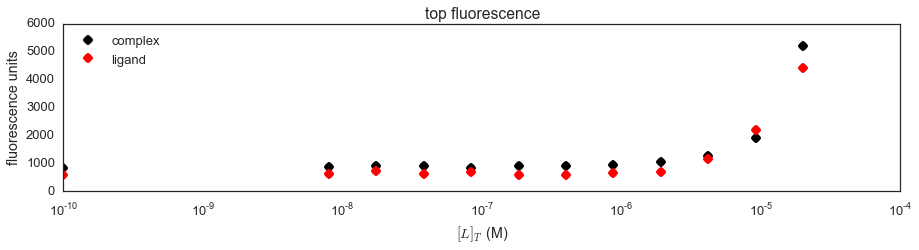

In [23]:
from assaytools import plots
figure = plots.plot_measurements(Lstated, Pstated, pymc_model)

In [24]:
# Find the maximum a posteriori fit (will only be local optimum, and several cycles are needed for reasonable fit)
map = pymcmodels.map_fit(pymc_model)

MAP fitting cycle 5/5


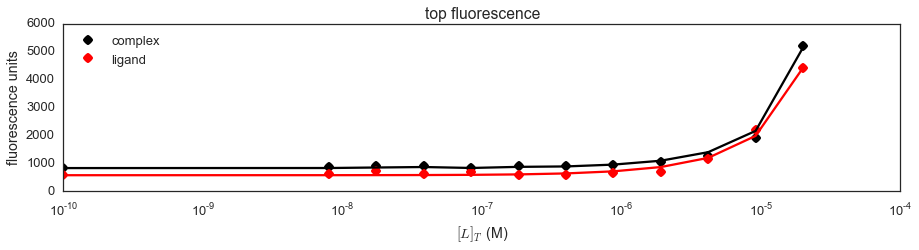

In [25]:
figure = plots.plot_measurements(Lstated, Pstated, pymc_model, map=map)

(1000,)


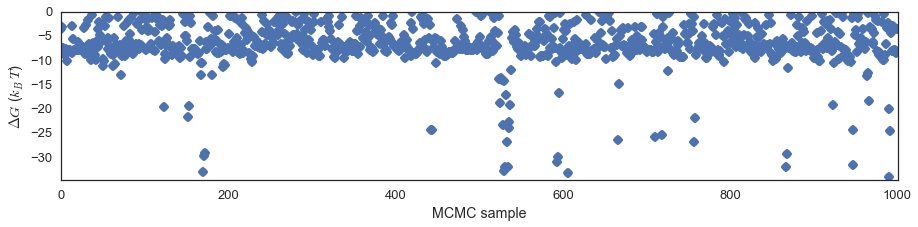

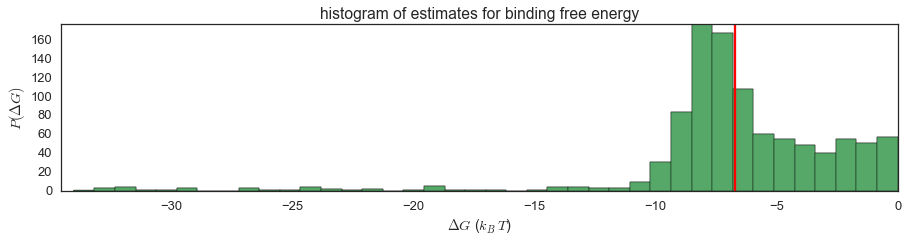

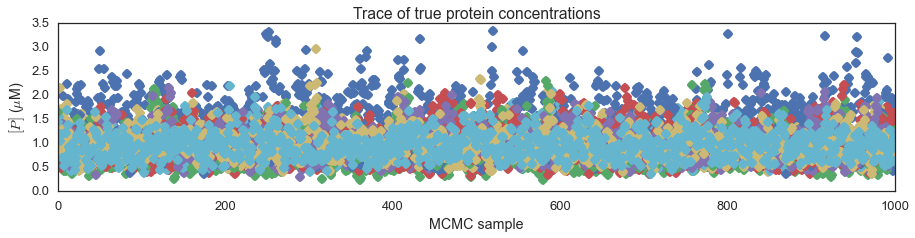

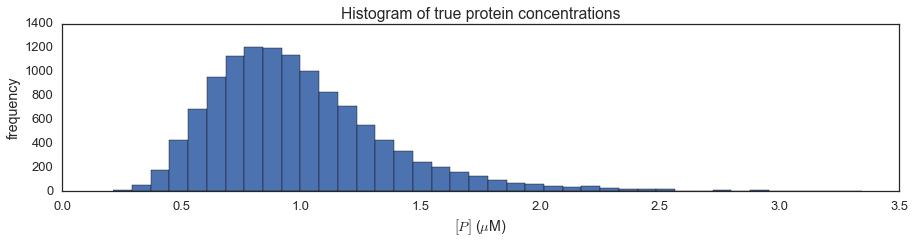

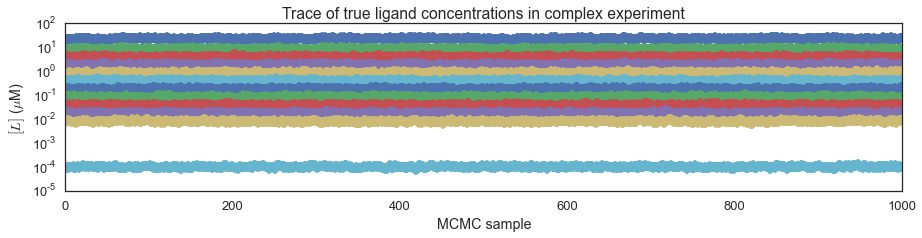

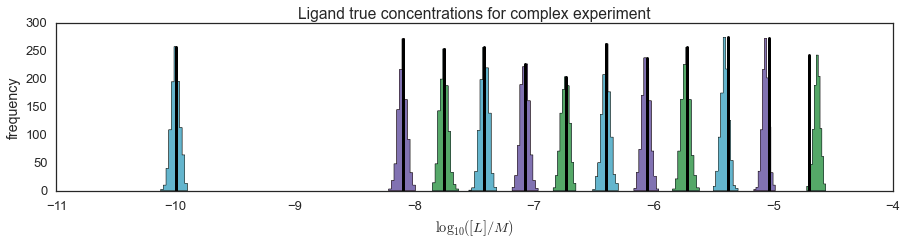

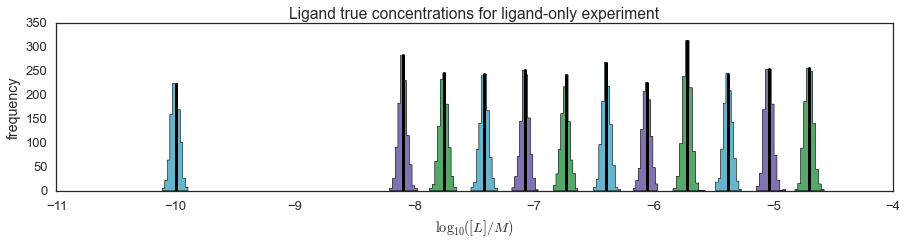

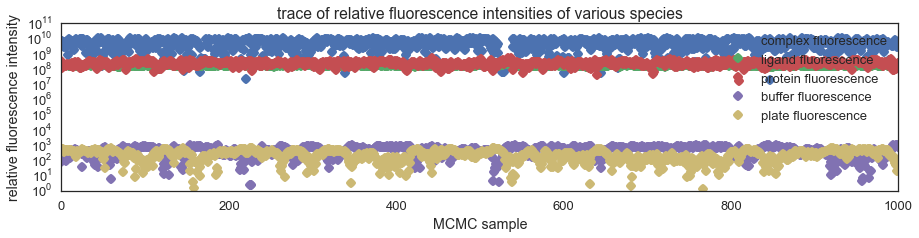

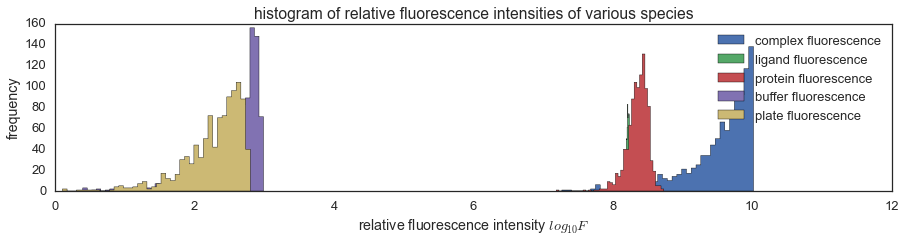

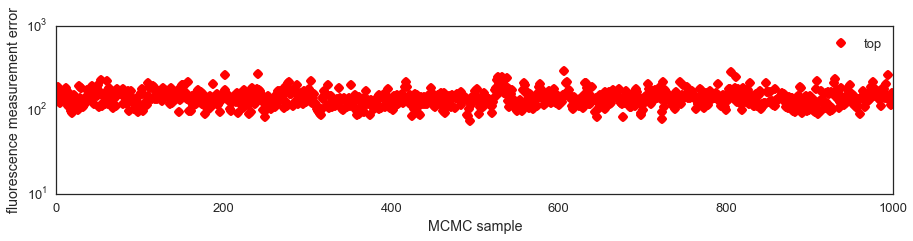

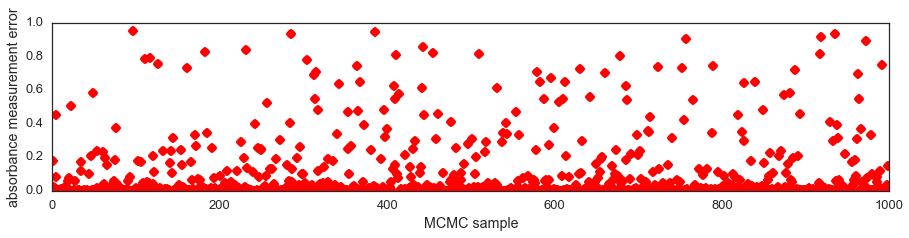

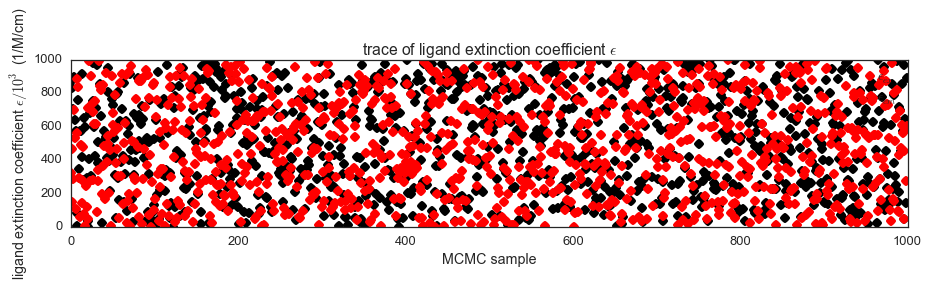

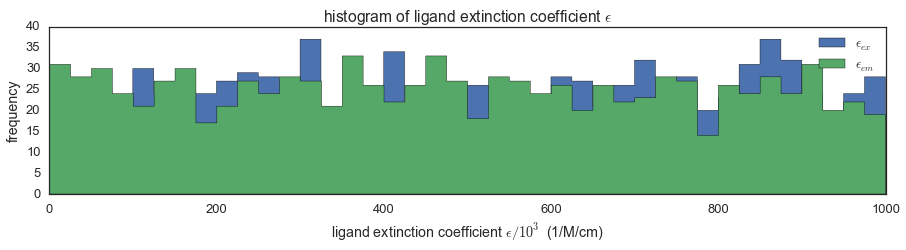

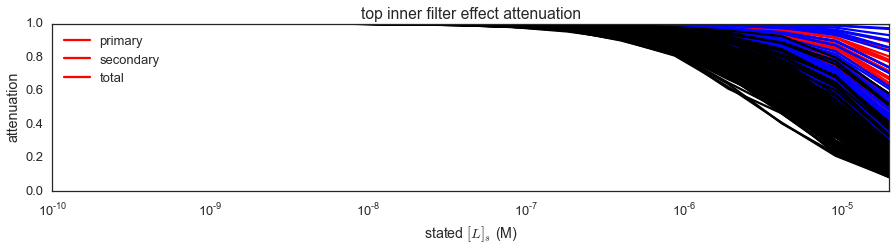

In [26]:
mcmc = pymc.MCMC(pymc_model, db='ram', name='Sampler', verbose=True)
nthin = 20
nburn = nthin*1000
niter = nthin*1000
mcmc.sample(iter=(nburn+niter), burn=nburn, thin=nthin, progress_bar=False, tune_throughout=False)

plots.plot_mcmc_results(Lstated, Pstated, path_length, mcmc)

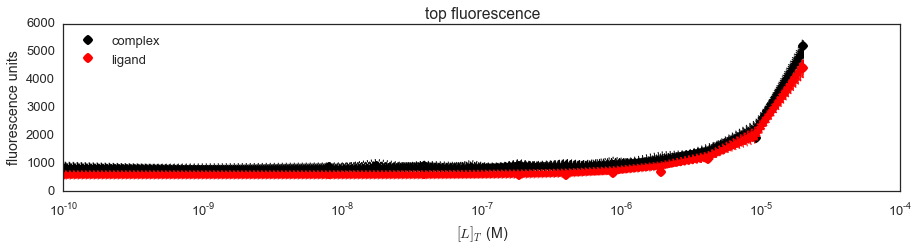

In [27]:
figure = plots.plot_measurements(Lstated, Pstated, pymc_model, mcmc=mcmc)

In [28]:
# Fit maximum a posteriori estimate one more time
map = pymcmodels.map_fit(pymc_model)

MAP fitting cycle 5/5


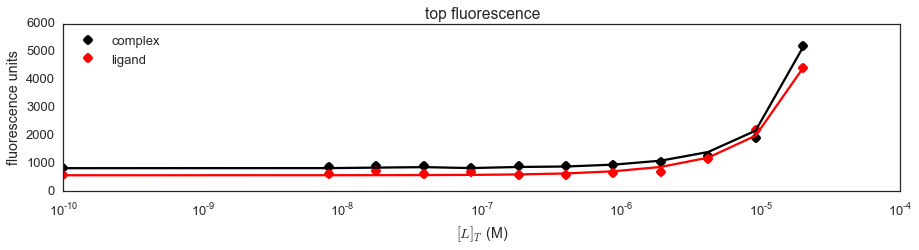

In [29]:
figure = plots.plot_measurements(Lstated, Pstated, pymc_model, map=map)

In [30]:
pymcmodels.show_summary(pymc_model, map, mcmc)

DeltaG = -7.7 +- 4.7 kT
Kd = 451.9 uM +- 171209.2 uM
